In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline


In [8]:
df = pd.read_csv('data_full_pd.csv')
df.head()

,S.NO,N,k,edge,zeros_around,time_sec,square_matrix_size,edge/N,zeros_around/N
0,1,100,0.001,331,462,1688.157222,101,3.310,4.620000
1,2,200,0.001,533,804,2461.425525,101,2.665,4.020000
2,3,300,0.001,708,1150,3120.216575,101,2.360,3.833333
3,4,400,0.001,856,1418,3740.840944,101,2.140,3.545000
4,5,500,0.001,1036,1686,4205.218238,101,2.072,3.372000


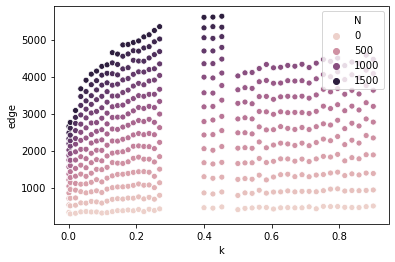

In [9]:
sns.scatterplot(data=df, x="k", y="edge", hue = "N"  )

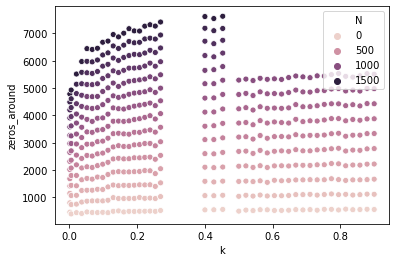

In [10]:
sns.scatterplot(data=df, x="k", y="zeros_around", hue = "N"  )

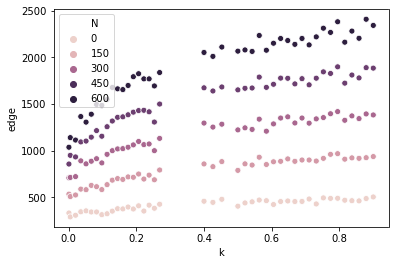

In [11]:
sns.scatterplot(data=df[df['N']<=500], x="k", y="edge", hue = "N"  )

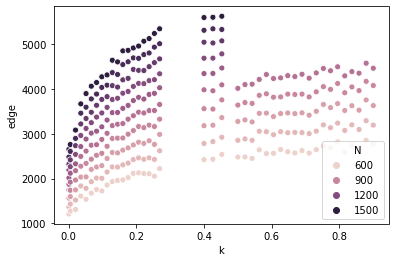

In [12]:
sns.scatterplot(data=df[df['N']>500], x="k", y="edge", hue = "N"  )

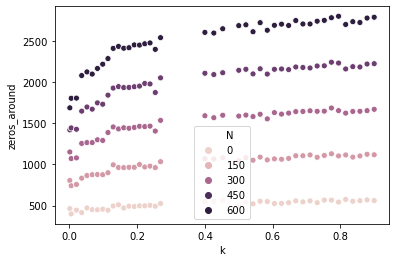

In [13]:
sns.scatterplot(data=df[df['N']<=500], x="k", y="zeros_around", hue = "N"  )

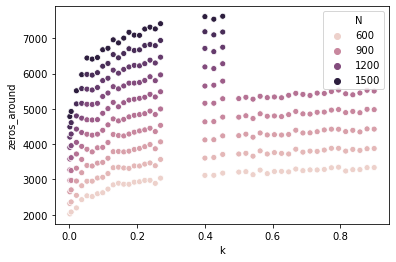

In [14]:
sns.scatterplot(data=df[df['N']>500], x="k", y="zeros_around", hue = "N"  )

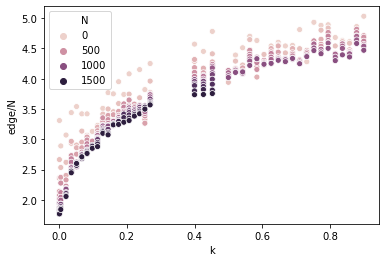

In [15]:
sns.scatterplot(data=df, x="k", y="edge/N", hue = "N"  )

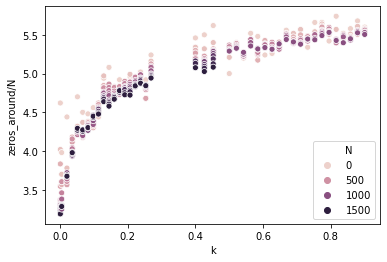

In [16]:
sns.scatterplot(data=df, x="k", y="zeros_around/N", hue = "N"  )

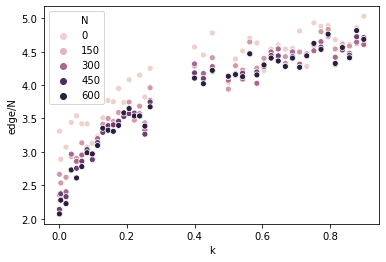

In [17]:
df2 = df[df['N']<=500]
sns.scatterplot(data=df2, x="k", y="edge/N", hue = "N"  )

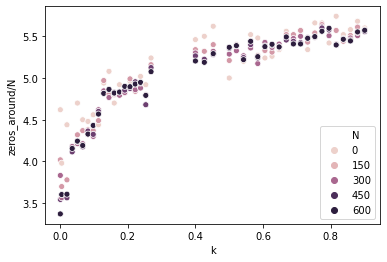

In [18]:
sns.scatterplot(data=df2, x="k", y="zeros_around/N", hue = "N"  )

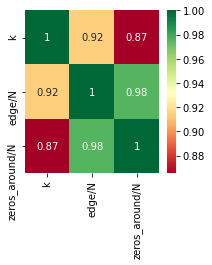

In [19]:
df_heat = df[['k','edge/N','zeros_around/N']]

corrmat = df_heat.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (3,3))

#heat map
g = sns.heatmap(df[top_corr_features].corr(),annot= True, cmap = 'RdYlGn')

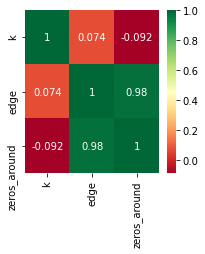

In [20]:
df_heat2 = df[['k','edge','zeros_around']]

corrmat = df_heat2.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (3,3))

#heat map
g = sns.heatmap(df[top_corr_features].corr(),annot= True, cmap = 'RdYlGn')

In [21]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df[['edge/N','k']], test_size=0.2)

In [22]:
## Case - 1; First characteristic feature 
#For edge/N 

In [23]:
x_train = train['edge/N'].to_numpy()
y_train = train['k'].to_numpy()
x_test = test['edge/N'].to_numpy()
y_test = test['k'].to_numpy()

In [24]:
coeffs = np.polyfit(x_train, y_train, 1)
f1 =  np.poly1d(coeffs)
coeffs = np.polyfit(x_train, y_train, 2)
f2 =  np.poly1d(coeffs)
coeffs = np.polyfit(x_train, y_train, 3)
f3 =  np.poly1d(coeffs)

In [25]:
ytrain_pred1 = f1(x_train)
ytest_pred1 = f1(x_test)

ytrain_pred2 = f2(x_train)
ytest_pred2 = f2(x_test)

ytrain_pred3 = f3(x_train)
ytest_pred3 = f3(x_test)


rmse_train_1 = np.sqrt(mean_squared_error(y_train,ytrain_pred1))
r2_train_1 = r2_score(y_train,ytrain_pred1)

print('rmse_train_1st_degree : ', rmse_train_1 )
print('r2_train_1st_degree : ', r2_train_1 )

rmse_test_1 = np.sqrt(mean_squared_error(y_test,ytest_pred1))
r2_test_1 = r2_score(y_test,ytest_pred1)

print('rmse_test_1st_degree : ', rmse_test_1 )
print('r2_test_1st_degree : ', r2_test_1)


print('______________________________________________________________________________________')

rmse_train_2 = np.sqrt(mean_squared_error(y_train,ytrain_pred2))
r2_train_2 = r2_score(y_train,ytrain_pred2)

print('rmse_train_2nd_degree : ', rmse_train_2 )
print('r2_train_2nd_degree : ', r2_train_2 )

rmse_test_2 = np.sqrt(mean_squared_error(y_test,ytest_pred2))
r2_test_2 = r2_score(y_test,ytest_pred2)

print('rmse_test_2nd_degree : ', rmse_test_2 )
print('r2_test_2nd_degree : ', r2_test_2)


print('______________________________________________________________________________________')

rmse_train_3 = np.sqrt(mean_squared_error(y_train,ytrain_pred3))
r2_train_3 = r2_score(y_train,ytrain_pred3)

print('rmse_train_3rd_degree : ', rmse_train_3 )
print('r2_train_3rd_degree : ', r2_train_3 )

rmse_test_3 = np.sqrt(mean_squared_error(y_test,ytest_pred3))
r2_test_3 = r2_score(y_test,ytest_pred3)

print('rmse_test_3rd_degree : ', rmse_test_3 )
print('r2_test_3rd_degree : ', r2_test_3)


print('______________________________________________________________________________________')





rmse_train_1st_degree :  0.11377440595923163
r2_train_1st_degree :  0.8401393963988908
rmse_test_1st_degree :  0.12154859498435464
r2_test_1st_degree :  0.8262235605145649
______________________________________________________________________________________
rmse_train_2nd_degree :  0.07780212490071686
r2_train_2nd_degree :  0.9252458664611117
rmse_test_2nd_degree :  0.09180611578379994
r2_test_2nd_degree :  0.9008633509553469
______________________________________________________________________________________
rmse_train_3rd_degree :  0.07751366803545265
r2_train_3rd_degree :  0.925799151329516
rmse_test_3rd_degree :  0.09110894038002383
r2_test_3rd_degree :  0.9023633207725923
______________________________________________________________________________________


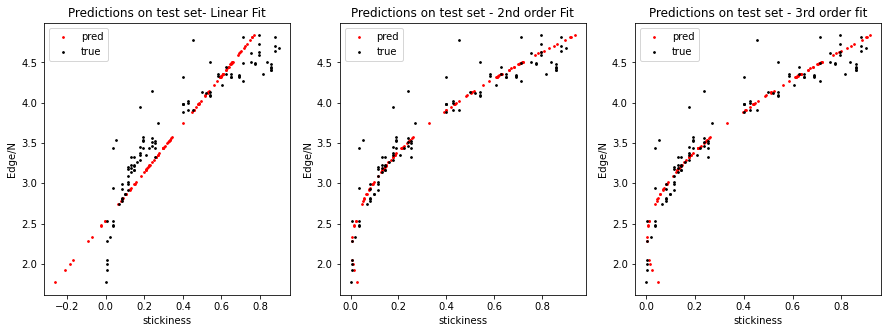

In [26]:
plt. subplots(figsize=(15,5))

fig = plt.subplot(1, 3, 1)
plt.scatter(y = x_test, x = ytest_pred1, s = 3, c = 'red', label = 'pred', marker = 'o')
plt.scatter(y = x_test, x = y_test, s = 3, c = 'black', label = 'true', marker = 'o')
plt.title('Predictions on test set- Linear Fit')
plt.xlabel('stickiness')
plt.ylabel('Edge/N')
plt.legend()

fig = plt.subplot(1, 3, 2)
plt.scatter(y = x_test, x = ytest_pred2, s = 3, c = 'red', label = 'pred', marker = 'o')
plt.scatter(y = x_test, x = y_test, s = 3, c = 'black', label = 'true', marker = 'o')
plt.title('Predictions on test set - 2nd order Fit')
plt.xlabel('stickiness')
plt.ylabel('Edge/N')
plt.legend()



fig = plt.subplot(1, 3, 3)
plt.scatter(y = x_test, x = ytest_pred3, s = 3, c = 'red', label = 'pred', marker = 'o')
plt.scatter(y = x_test, x = y_test, s = 3, c = 'black', label = 'true', marker = 'o')
plt.title('Predictions on test set - 3rd order fit')
plt.xlabel('stickiness')
plt.ylabel('Edge/N')
plt.legend()






In [27]:
# Case - 2; Second characteristic feature

#For zeros_around/N 

In [28]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df[['zeros_around/N','k']], test_size=0.2)

In [29]:
x_train = train['zeros_around/N'].to_numpy()
y_train = train['k'].to_numpy()
x_test = test['zeros_around/N'].to_numpy()
y_test = test['k'].to_numpy()

In [30]:
coeffs = np.polyfit(x_train, y_train, 1)
f1 =  np.poly1d(coeffs)
coeffs = np.polyfit(x_train, y_train, 2)
f2 =  np.poly1d(coeffs)
coeffs = np.polyfit(x_train, y_train, 3)
f3 =  np.poly1d(coeffs)

In [31]:
ytrain_pred1 = f1(x_train)
ytest_pred1 = f1(x_test)

ytrain_pred2 = f2(x_train)
ytest_pred2 = f2(x_test)

ytrain_pred3 = f3(x_train)
ytest_pred3 = f3(x_test)


rmse_train_1 = np.sqrt(mean_squared_error(y_train,ytrain_pred1))
r2_train_1 = r2_score(y_train,ytrain_pred1)

print('rmse_train_1st_degree : ', rmse_train_1 )
print('r2_train_1st_degree : ', r2_train_1 )

rmse_test_1 = np.sqrt(mean_squared_error(y_test,ytest_pred1))
r2_test_1 = r2_score(y_test,ytest_pred1)

print('rmse_test_1st_degree : ', rmse_test_1 )
print('r2_test_1st_degree : ', r2_test_1)


print('______________________________________________________________________________________')

rmse_train_2 = np.sqrt(mean_squared_error(y_train,ytrain_pred2))
r2_train_2 = r2_score(y_train,ytrain_pred2)

print('rmse_train_2nd_degree : ', rmse_train_2 )
print('r2_train_2nd_degree : ', r2_train_2 )

rmse_test_2 = np.sqrt(mean_squared_error(y_test,ytest_pred2))
r2_test_2 = r2_score(y_test,ytest_pred2)

print('rmse_test_2nd_degree : ', rmse_test_2 )
print('r2_test_2nd_degree : ', r2_test_2)


print('______________________________________________________________________________________')

rmse_train_3 = np.sqrt(mean_squared_error(y_train,ytrain_pred3))
r2_train_3 = r2_score(y_train,ytrain_pred3)

print('rmse_train_3rd_degree : ', rmse_train_3 )
print('r2_train_3rd_degree : ', r2_train_3 )

rmse_test_3 = np.sqrt(mean_squared_error(y_test,ytest_pred3))
r2_test_3 = r2_score(y_test,ytest_pred3)

print('rmse_test_3rd_degree : ', rmse_test_3 )
print('r2_test_3rd_degree : ', r2_test_3)


print('______________________________________________________________________________________')



rmse_train_1st_degree :  0.14079561584661376
r2_train_1st_degree :  0.7562815518592797
rmse_test_1st_degree :  0.15330460549375263
r2_test_1st_degree :  0.7125832091368913
______________________________________________________________________________________
rmse_train_2nd_degree :  0.0726552133867563
r2_train_2nd_degree :  0.9351001480885466
rmse_test_2nd_degree :  0.09468900580595195
r2_test_2nd_degree :  0.8903519669079691
______________________________________________________________________________________
rmse_train_3rd_degree :  0.06672273632471687
r2_train_3rd_degree :  0.9452659180960279
rmse_test_3rd_degree :  0.08964969832253089
r2_test_3rd_degree :  0.9017122491359759
______________________________________________________________________________________


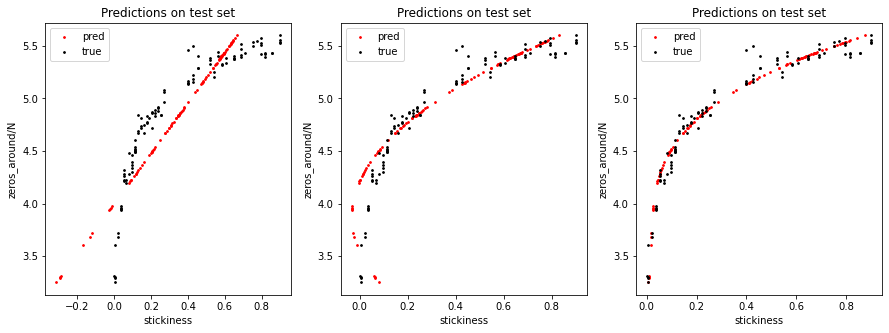

In [144]:
plt. subplots(figsize=(15,5))

fig = plt.subplot(1, 3, 1)
plt.scatter(y = x_test, x = ytest_pred1, s = 3, c = 'red', label = 'pred', marker = 'o')
plt.scatter(y = x_test, x = y_test, s = 3, c = 'black', label = 'true', marker = 'o')
plt.title('Predictions on test set - Linear Fit')
plt.xlabel('stickiness')
plt.ylabel('zeros_around/N')
plt.legend()

fig = plt.subplot(1, 3, 2)
plt.scatter(y = x_test, x = ytest_pred2, s = 3, c = 'red', label = 'pred', marker = 'o')
plt.scatter(y = x_test, x = y_test, s = 3, c = 'black', label = 'true', marker = 'o')
plt.title('Predictions on test set - 2nd order Fit')
plt.xlabel('stickiness')
plt.ylabel('zeros_around/N')
plt.legend()



fig = plt.subplot(1, 3, 3)
plt.scatter(y = x_test, x = ytest_pred3, s = 3, c = 'red', label = 'pred', marker = 'o')
plt.scatter(y = x_test, x = y_test, s = 3, c = 'black', label = 'true', marker = 'o')
plt.title('Predictions on test set - 3rd order Fit')
plt.xlabel('stickiness')
plt.ylabel('zeros_around/N')
plt.legend()